# Heiarchical Model

### Import packages and data

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import DistanceMetric
import warnings
warnings.simplefilter("ignore")
#import scipy.cluster.hierarchy as shc
%matplotlib inline

In [5]:
data = pd.read_csv('Data/customer_data.csv')
pca_data = pd.read_csv('Data/pca_customer_data.csv')
#data = table.to_pandas()

In [6]:
del data["Unnamed: 0"]
del data["UniqueID"]
data.head(2)

,FrequencyofVisits,Age,Sex,Payer,Facility
0,3,37.0,Feminino,FUTURE HEALTHCARE,HCS
1,13,37.0,Feminino,FUTURE HEALTHCARE,ICDT


In [8]:
del pca_data["Unnamed: 0"]
pca_data = pca_data.drop(columns="UniqueID")

KeyError: 'Unnamed: 0'

In [9]:
pca_data.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.364037,-0.107169,-0.007892,-0.105537,0.09196,-0.068248,0.039098,0.171010,-0.179154,0.146908,0.804683,0.110341,0.694594,-0.162076
1,-0.365604,-0.133887,0.015146,-0.162602,0.24113,-0.055893,-0.131696,0.186359,-0.586681,-0.594955,0.075158,0.546117,0.046840,-0.012824


In [10]:
pca_data = pca_data[:10000]
data = data[:10000]

In [11]:
pca_data.shape

(10000, 14)

In [12]:
data.shape

(10000, 5)

## Hierarchical Model

In [13]:
import scipy.cluster.hierarchy as shc

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

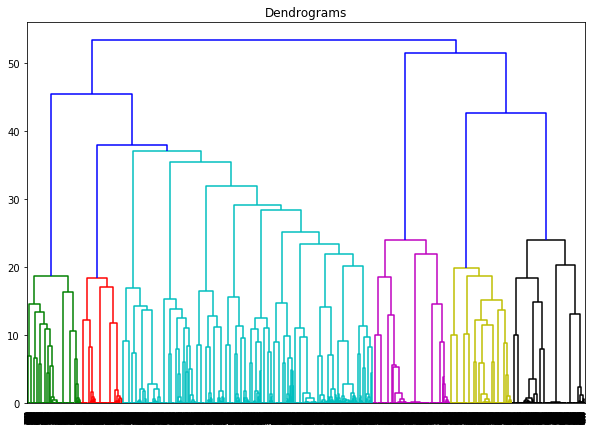

In [16]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pca_data, method='ward'))
plt.axhline(y=60, color='r', linestyle='--')

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster_id = cluster.fit_predict(pca_data)

### Label Clusters in df

In [20]:
data["Cluster"] = cluster_id 

In [21]:
data.Cluster.unique()

array([0, 3, 2, 1, 5, 4])

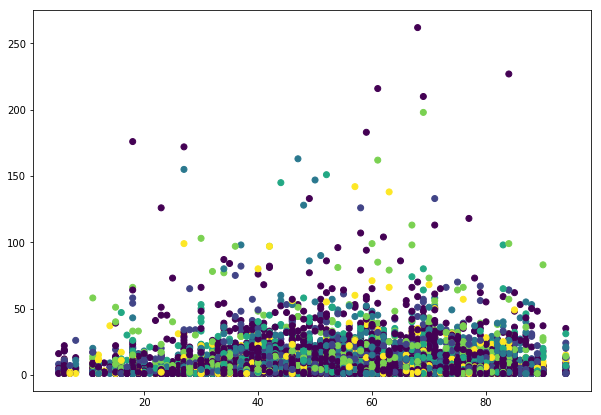

In [22]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['Age'], data['FrequencyofVisits'], c=cluster.labels_) 

## Cluster Evaluation

In [23]:
numerical_data = data.select_dtypes(np.number)
categorical_data = data.select_dtypes([object, "category"])

In [24]:
def cluster_summary(cluster_id):
    cluster = data[data.Cluster==cluster_id]
    cluster_summary = cluster[categorical_data.columns].mode().to_dict(orient="records")[0]
    cluster_summary.update(cluster.mean().to_dict())
    cluster_summary["cluster_id"] = cluster_id
    return cluster_summary

In [ ]:
cluster0 = data[data.Cluster==0]
cluster[categorical_data.columns].mode().to_dict(orient="records")

In [ ]:
cluster1 = data[data.Cluster==1]
cluster[categorical_data.columns].mode().to_dict(orient="records")

In [ ]:
cluster2 = data[data.Cluster==2]
cluster[categorical_data.columns].mode().to_dict(orient="records")

In [25]:
cluster_summary(2)

{'Sex': 'Feminino',
 'Payer': 'MULTICARE',
 'Facility': 'HCD',
 'FrequencyofVisits': 8.722830051057622,
 'Age': 57.117432530999274,
 'Cluster': 2.0,
 'cluster_id': 2}

In [26]:
def cluster_comparison(*cluster_ids):
    summaries = []
    for cluster_id in cluster_ids:
        summaries.append(cluster_summary(cluster_id))
    return pd.DataFrame(summaries).set_index("cluster_id").T

In [27]:
cluster_comparison(0,1,2, 3, 4, 5)

cluster_id,0,1,2,3,4,5
Age,56.0471,56.3598,57.1174,55.9855,56.6571,55.9214
Cluster,0,1,2,3,4,5
Facility,HCIS,HCD,HCD,HCD,HCP,HCP
FrequencyofVisits,7.59031,7.95579,8.72283,8.30093,9.55626,8.24932
Payer,ADSE,MÉDIS,MULTICARE,ADVANCECARE,MÉDIS,ADSE
Sex,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino
